#### Setup

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import pyvista as pv
from pyvista import Plotter as Pl

# My `numpy` API

In [56]:
class MeshPlotter:
    def show(self, **kwargs):
        p = Pl()
        p.add_mesh(self, **kwargs)
        p.show_grid()
        p.show_axes()
        p.show()    
class Sg(MeshPlotter,pv.StructuredGrid,):
    def __init__(self, arr, extent=None, **kwargs):
        xx, yy = self._get_xy(arr, extent)
        super().__init__(xx, yy, arr, **kwargs)
    def _get_xy(self, arr, extent=None):    
        nx, ny = arr.shape
        if extent is None:
            x1, x2, y1, y2 = 0, nx-1, 0, ny-1
        else:
            [[x1, x2], [y1, y2]] = extent    
        dx, dy = (x2-x1)/(nx-1), (y2-y1)/(ny-1)
        x = np.arange(x1, x2+dx, dx)
        y = np.arange(y1, y2+dx, dy)
        xx, yy = np.meshgrid(x, y)
        return xx, yy
    def plot(self, color_scale=True, **kwargs):
        if color_scale:
            kwargs['scalars'] = kwargs.get('scalars', self.points[:,2])
        return super().plot(**kwargs)
class Ug(MeshPlotter,pv.UniformGrid):
    def __init__(self, arr=None, extent=None, cell_data=True, order='F', **kwargs):
        super().__init__(**kwargs)
        if arr is not None:
            self._set_arr(arr, extent, cell_data, order)
    def _set_arr(self, arr, extent=None, cell_data=True, order='F'):
        nx, ny, nz = arr.shape
        if extent is None:
            x1, x2, y1, y2, z1, z2 = 0, nx, 0, ny, 0, nz
            dx, dy, dz = (x2-x1)/nx, (y2-y1)/ny, (z2-z1)/nz
        else:
            [[x1, x2], [y1, y2], [z1, z2]] = extent
            dx, dy, dz = (x2-x1)/(nx-1), (y2-y1)/(ny-1), (z2-z1)/(nz-1)
        if cell_data:
            origin = (x1-dx/2,y1-dy/2,z1-dz/2)
            dims = np.array(arr.shape) + 1
        else:
            if extent is None:
                x1, x2, y1, y2, z1, z2 = 0, nx-1, 0, ny-1, 0, nz-1
            dx, dy, dz = (x2-x1)/(nx-1), (y2-y1)/(ny-1), (z2-z1)/(nz-1)
            origin = (x1,y1,z1)
            dims = np.array(arr.shape) 
        self.origin = origin
        self.spacing = (dx,dy,dz) 
        self.dimensions = dims
        if cell_data:
            self.cell_data["values"] = arr.flatten(order=order)
        else:
            self.point_data["values"] = arr.flatten(order=order)
#     def carve(self, bounds):
#         return self._clip(bounds, invert=True)
#     def crop(self, bounds):
#         return self._clip(bounds, invert=False)    
    def plot(self, **kwargs):
        kwargs['show_axes'] = kwargs.get('show_axes', True)
        kwargs['show_edges'] = kwargs.get('show_edges', False)
        kwargs['show_grid'] = kwargs.get('show_grid', True)
        super().plot(**kwargs)
#     def _my_clip(self, bounds, invert):
#         if len(bounds) == 6:
#             x1, x2, y1, y2, z1, z2 = bounds
#         elif len(bounds) == 3:
#             [[x1, x2], [y1, y2], [z1, z2]] = bounds
#         dx, dy, dz = self.spacing
#         box = [x1-dx/2, x2+dx/2, y1-dy/2, y2+dy/2, z1-dz/2, z2+dz/2]
#         return self.clip_box(box, invert) 
# already used above
def np2sg(arr, extent=None):
    nx, ny = arr.shape
    if extent is None:
        x1, x2, y1, y2 = 0, nx-1, 0, ny-1
    else:
        [[x1, x2], [y1, y2]] = extent    
    dx, dy = (x2-x1)/(nx-1), (y2-y1)/(ny-1)
    x = np.arange(x1, x2+dx, dx)
    y = np.arange(y1, y2+dx, dy)
    xx, yy = np.meshgrid(x, y)
    return pv.StructuredGrid(xx, yy, arr)  
def np2ug(arr, extent=None, cell_data=True, order='F'):
    nx, ny, nz = arr.shape
    if extent is None:
        x1, x2, y1, y2, z1, z2 = 0, nx, 0, ny, 0, nz
        dx, dy, dz = (x2-x1)/nx, (y2-y1)/ny, (z2-z1)/nz
    else:
        [[x1, x2], [y1, y2], [z1, z2]] = extent
        dx, dy, dz = (x2-x1)/(nx-1), (y2-y1)/(ny-1), (z2-z1)/(nz-1)
    
    if cell_data:
#         dx, dy, dz = (x2-x1)/nx, (y2-y1)/ny, (z2-z1)/nz
        origin = (x1-dx/2,y1-dy/2,z1-dz/2)
        dims = np.array(arr.shape) + 1
    else:
        if extent is None:
            x1, x2, y1, y2, z1, z2 = 0, nx-1, 0, ny-1, 0, nz-1
        dx, dy, dz = (x2-x1)/(nx-1), (y2-y1)/(ny-1), (z2-z1)/(nz-1)
        origin = (x1,y1,z1)
        dims = np.array(arr.shape)
    ug = pv.UniformGrid()
    ug.origin = origin
    ug.spacing = (dx,dy,dz) 
    ug.dimensions = dims
    if cell_data:
        ug.cell_data["values"] = arr.flatten(order=order)
    else:
        ug.point_data["values"] = arr.flatten(order=order)
    return ug

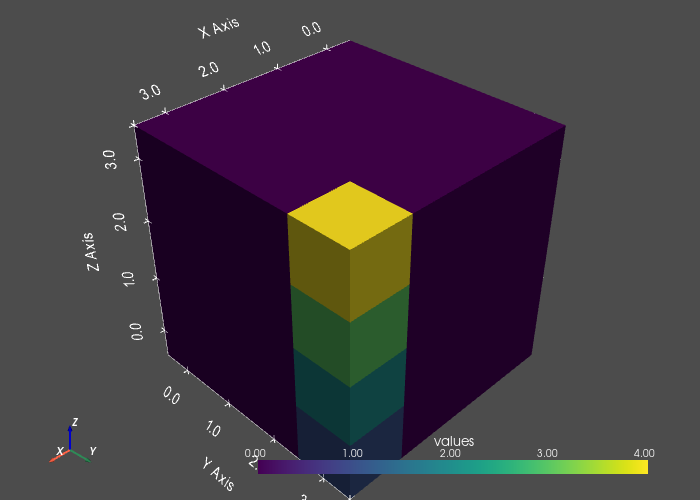

In [97]:
# test Ug 
nx, ny, nz = 4, 4, 4
x1, x2, y1, y2, z1, z2 = 0,3,0,3,0,3
extent = [[x1,x2],[y1,y2],[z1,z2]]
v = np.zeros((nx,ny,nz))
v[-1,-1,:] = np.arange(1,nz+1) 
v = Ug(v)
v.plot()

# Kolumbo data

In [57]:
# dvp models  
# !ls ../../data
x1, x2, y1, y2, z1, z2 = 8e3, 18e3, 4e3, 14e3, 0, -4e3
extent_vp = [[x1, x2], [y1, y2], [z1, z2]]
shape = (201,201,81)
fname = {
    10:  '../../data/p14-CP00010-dVp_x8000_18000_y4000_14000_z0_4000_shape201x201x81.mmp',
    20:  '../../data/p14-CP00020-dVp_x8000_18000_y4000_14000_z0_4000_shape201x201x81.mmp',
    80:  '../../data/p14-CP00080-dVp_x8000_18000_y4000_14000_z0_4000_shape201x201x81.mmp',
    160: '../../data/p14-CP00160-dVp_x8000_18000_y4000_14000_z0_4000_shape201x201x81.mmp',
}
dvp_arr = {}
dvp = {}
for key, val in fname.items():
    arr = np.memmap(val, dtype=np.float32, shape=shape)
    dvp_arr[key] = arr
    dvp[key] = Ug(arr, extent=extent_vp)
# plt.imshow(vp[...,0].T)
# plt.colorbar()
# plt.gca().invert_yaxis()

In [58]:
# bt 
fname = '../../data/bt_x8000_18000_y4000_14000_shape201x201.mmp'
arr_bt = np.memmap(fname, dtype=np.float32, shape=(201,201))
bt = Sg(-arr_bt, extent=[[8e3, 18e3], [4e3, 14e3]])
# bt.plot(color_scale=1)
# plt.imshow(bt.T)
# # plt.imshow(bt[55:136,55:136].T)
# plt.colorbar()
# plt.gca().invert_yaxis()

# Global theme

## Set

In [59]:
pv.set_plot_theme('document')
# pv.set_plot_theme('paraview')
# pv.set_plot_theme('dark')
# pv.set_plot_theme('default')

## List

In [18]:
pv.global_theme

Default Theme
-------------
Background               : [0.3, 0.3, 0.3]
Jupyter backend          : ipyvtklink
Full screen              : False
Window size              : [1024, 768]
Camera                   : {'position': [1, 1, 1], 'viewup': [0, 0, 1]}
Notebook                 : None
Font                     : 
    Family               : arial
    Size                 : 12
    Title size           : None
    Label size           : None
    Color                : [1, 1, 1]
    Float format         : None
Auto close               : True
Colormap                 : viridis
Color                    : (1.0, 1.0, 1.0)
NaN color                : (0.6627450980392157, 0.6627450980392157, 0.6627450980392157)
Edge color               : (0.0, 0.0, 0.0)
Outline color            : (1.0, 1.0, 1.0)
Floor color              : (0.5019607843137255, 0.5019607843137255, 0.5019607843137255)
Colorbar orientation     : horizontal
Colorbar - horizontal    : 
    Width                : 0.6
    Height            

In [13]:
pv.global_theme.jupyter_backend

'ipyvtklink'

In [43]:
dir(pv.global_theme)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '_antialiasing',
 '_auto_close',
 '_axes',
 '_background',
 '_camera',
 '_cmap',
 '_color',
 '_colorbar_horizontal',
 '_colorbar_orientation',
 '_colorbar_vertical',
 '_depth_peeling',
 '_edge_color',
 '_floor_color',
 '_font',
 '_full_screen',
 '_hidden_line_removal',
 '_interactive',
 '_jupyter_backend',
 '_lighting',
 '_multi_rendering_splitting_position',
 '_multi_samples',
 '_name',
 '_nan_color',
 '_notebook',
 '_outline_color',
 '_render_points_as_spheres',
 '_return_cpos',
 '_show_edges',
 '_show_scalar_bar',
 '_silhouette',
 '_slider_styles',
 '_smooth_shading',
 '_title',
 '_

In [47]:
dir(pv.global_theme.axes)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '_box',
 '_show',
 '_x_color',
 '_y_color',
 '_z_color',
 'box',
 'from_dict',
 'show',
 'to_dict',
 'x_color',
 'y_color',
 'z_color']

## Modify

In [60]:
gt = pv.global_theme
gt.window_size = [700, 500]
gt.axes.show = 1
gt.show_edges = 0
gt.return_cpos = 1
gt.jupyter_backend = 'none' # 'panel', #'ipygany', #'pythreejs'

This will revert to defaults on kernel restart. Or upon:

In [17]:
pv.global_theme.restore_defaults()

# Plotter

In [10]:
help(pv.Plotter)

Help on class Plotter in module pyvista.plotting.plotting:

class Plotter(BasePlotter)
 |  Plotter(off_screen=None, notebook=None, shape=(1, 1), groups=None, row_weights=None, col_weights=None, border=None, border_color='k', border_width=2.0, window_size=None, multi_samples=None, line_smoothing=False, point_smoothing=False, polygon_smoothing=False, splitting_position=None, title=None, lighting='light kit', theme=None)
 |  
 |  Plotting object to display vtk meshes or numpy arrays.
 |  
 |  Parameters
 |  ----------
 |  off_screen : bool, optional
 |      Renders off screen when ``True``.  Useful for automated
 |      screenshots.
 |  
 |  notebook : bool, optional
 |      When ``True``, the resulting plot is placed inline a jupyter
 |      notebook.  Assumes a jupyter console is active.  Automatically
 |      enables ``off_screen``.
 |  
 |  shape : list or tuple, optional
 |      Number of sub-render windows inside of the main window.
 |      Specify two across with ``shape=(2, 1)`` a

## Camera

In [ ]:
# p.camera_position = [
#     (392.9783280407326, 556.4341372317185, 235.51220650196404),
#     (88.69563012828344, 119.06774369173661, 72.61750326143748),
#     (-0.19275936948097383, -0.2218876327549124, 0.9558293278131397)]

In [ ]:
p.camera_position = [(418.3, 659., 53.8),
                     (90.2, 111.5, 90.0),
                     (0.03, 0.05, 1.0)]

In [135]:
help(pv.Plotter.set_viewup)

Help on function set_viewup in module pyvista.plotting.renderer:

set_viewup(self, vector)
    Set camera viewup vector.
    
    Parameters
    ----------
    vector : sequence
        New 3 value camera viewup vector.
    
    Examples
    --------
    Look from the top down by setting view up to ``[0, 1, 0]``.
    Notice how the Y axis appears vertical.
    
    >>> from pyvista import demos
    >>> pl = demos.orientation_plotter()
    >>> pl.set_viewup([0, 1, 0])
    >>> pl.show()



In [ ]:
pl.view_yx()

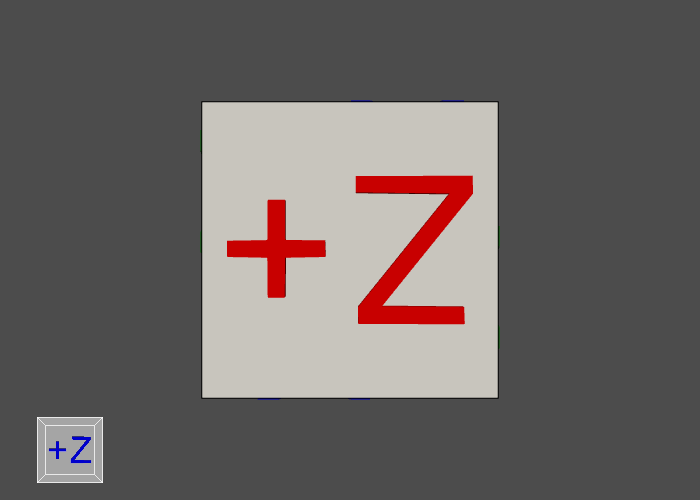

In [140]:
from pyvista import demos
pl = demos.orientation_plotter()
pl.set_viewup([.5,0,0])
pl.show()

# Structured grid

Surfaces?

In [89]:
sg = pv.StructuredGrid()
help(sg)

Help on StructuredGrid in module pyvista.core.pointset object:

class StructuredGrid(vtkmodules.vtkCommonDataModel.vtkStructuredGrid, PointGrid, pyvista.core.filters.structured_grid.StructuredGridFilters)
 |  StructuredGrid(*args, **kwargs) -> None
 |  
 |  Dataset used for topologically regular arrays of data.
 |  
 |  Can be initialized in one of the following several ways:
 |  
 |  - Create empty grid
 |  - Initialize from a vtk.vtkStructuredGrid object
 |  - Initialize directly from the point arrays
 |  
 |  See _from_arrays in the documentation for more details on initializing
 |  from point arrays
 |  
 |  Examples
 |  --------
 |  >>> import pyvista
 |  >>> import vtk
 |  >>> import numpy as np
 |  
 |  Create empty grid
 |  
 |  >>> grid = pyvista.StructuredGrid()
 |  
 |  Initialize from a vtk.vtkStructuredGrid object
 |  
 |  >>> vtkgrid = vtk.vtkStructuredGrid()
 |  >>> grid = pyvista.StructuredGrid(vtkgrid)
 |  
 |  Create from NumPy arrays
 |  
 |  >>> xrng = np.arange(-10

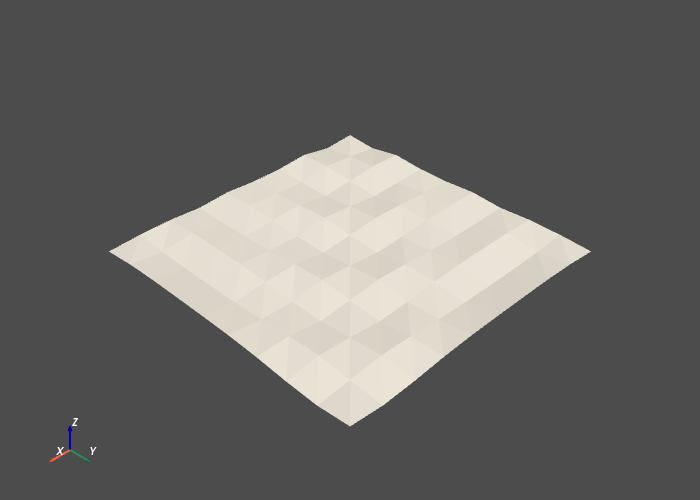

CPU times: user 168 ms, sys: 8 ms, total: 176 ms
Wall time: 175 ms


In [55]:
%%time 
x1, y1, z1 = np.ones(3) * 100
x2, y2, z2 = np.ones(3) * 200
x = np.linspace(x1, x2, 10)
y = np.linspace(y1, y2, 10)
x, y = np.meshgrid(x, y)
z = np.sin(np.sqrt(x**2+y**2)) * (z1 + (z2-z1)/2) / 100
sg = pv.StructuredGrid(x, y, z)
sg.plot()

# Uniform grid

Volumes?

In [88]:
ug = pv.UniformGrid()
help(ug)

Help on UniformGrid in module pyvista.core.grid object:

class UniformGrid(vtkmodules.vtkCommonDataModel.vtkImageData, Grid, pyvista.core.filters.uniform_grid.UniformGridFilters)
 |  UniformGrid(*args, **kwargs)
 |  
 |  Models datasets with uniform spacing in the three coordinate directions.
 |  
 |  Can be initialized in several ways:
 |  
 |  - Create empty grid
 |  - Initialize from a vtk.vtkImageData object
 |  - Initialize directly from the point arrays
 |  
 |  See ``_from_specs`` in the documentation for more details on initializing
 |  from point arrays
 |  
 |  Examples
 |  --------
 |  >>> import pyvista
 |  >>> import vtk
 |  >>> import numpy as np
 |  
 |  >>> # Create empty grid
 |  >>> grid = pyvista.UniformGrid()
 |  
 |  >>> # Initialize from a vtk.vtkImageData object
 |  >>> vtkgrid = vtk.vtkImageData()
 |  >>> grid = pyvista.UniformGrid(vtkgrid)
 |  
 |  >>> # Using just the grid dimensions
 |  >>> dims = (10, 10, 10)
 |  >>> grid = pyvista.UniformGrid(dims)
 |  
 | 

In [101]:
help(ug.plot)

Help on method plot in module pyvista.plotting.helpers:

plot(off_screen=None, full_screen=None, screenshot=None, interactive=True, cpos=None, window_size=None, show_bounds=False, show_axes=None, notebook=None, background=None, text='', return_img=False, eye_dome_lighting=False, volume=False, parallel_projection=False, use_ipyvtk=None, jupyter_backend=None, return_viewer=False, return_cpos=False, jupyter_kwargs={}, theme=None, hidden_line_removal=None, anti_aliasing=None, zoom=None, **kwargs) method of pyvista.core.grid.UniformGrid instance
    Plot a vtk or numpy object.
    
    Parameters
    ----------
    var_item : pyvista.DataSet, vtk, or numpy object
        VTK object or ``numpy`` array to be plotted.
    
    off_screen : bool, optional
        Plots off screen when ``True``.  Helpful for saving
        screenshots without a window popping up.  Defaults to the
        global setting ``pyvista.OFF_SCREEN``.
    
    full_screen : bool, optional
        Opens window in full scr

In [260]:
%%time 
nx, ny, nz = 4, 4, 4
v = np.zeros((nx,ny,nz))
v[-1,-1,:] = np.arange(1,n+1) # set z at last index of x and y

ug = pv.UniformGrid()
x1, y1, z1 = np.zeros(3)
x2, y2, z2 = np.ones(3) * 6
dx, dy, dz = (x2-x1)/(nx), (y2-y1)/(ny), (z2-z1)/(nz) # if cells, if points, use (nx-1) etc/
print(dx,dy,dz)
ug.origin = (x1,y1,z1)  # The bottom left corner of the data set
ug.spacing = (dx,dy,dz)  # These are the cell sizes along each axis
ug.dimensions = np.array(v.shape) + 1 # +1 because these are nodes v will be assigned to cells 
ug.cell_data["values"] = v.flatten(order="F") 
# ug.dimensions = np.array(v.shape)
# ug.point_data["values"] = v.flatten(order="F") 

1.5 1.5 1.5
CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 7.68 ms


In [261]:
ug

UniformGrid (0x7f9564a16fa0)
  N Cells:	64
  N Points:	125
  X Bounds:	0.000e+00, 6.000e+00
  Y Bounds:	0.000e+00, 6.000e+00
  Z Bounds:	0.000e+00, 6.000e+00
  Dimensions:	5, 5, 5
  Spacing:	1.500e+00, 1.500e+00, 1.500e+00
  N Arrays:	1

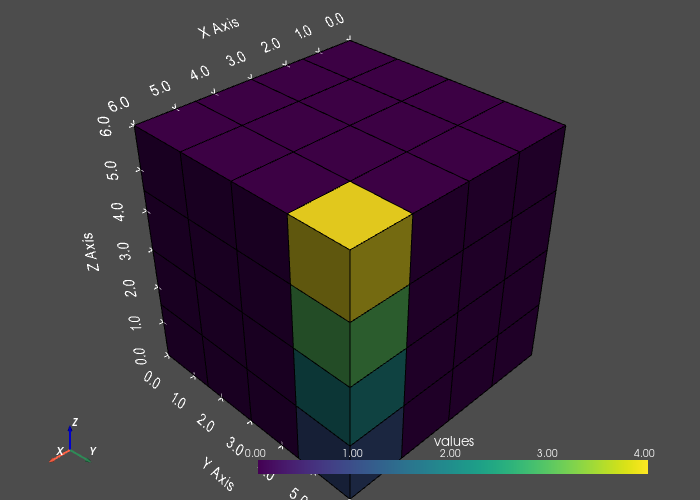

In [33]:
ug.plot(show_edges=1, show_grid=1, show_axes=1)

## Cells vs. nodes

In [25]:
%%time 
nx, ny, nz = 4, 4, 4
v = np.zeros((nx,ny,nz))
v[-1,-1,:] = np.arange(1,n+1) # set z at last index of x and y

ug = pv.UniformGrid()
x1, y1, z1 = np.zeros(3)
x2, y2, z2 = np.ones(3) * 6
dx, dy, dz = (x2-x1)/(nx-1), (y2-y1)/(ny-1), (z2-z1)/(nz-1)
ug.origin = (x1,y1,z1)  # The bottom left corner of the data set
ug.spacing = (dx,dy,dz)  # These are the cell sizes along each axis
# ug.dimensions = np.array(v.shape) + 1 # +1 because these are nodes v will be assigned to cells 
# ug.cell_data["values"] = v.flatten(order="F") 
ug.dimensions = np.array(v.shape)
ug.point_data["values"] = v.flatten(order="F") 

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 913 µs


This is a right-hand coordinate system, same as used 'at school'. In seismology we usually use left-hand one, with Z axis pointing down.

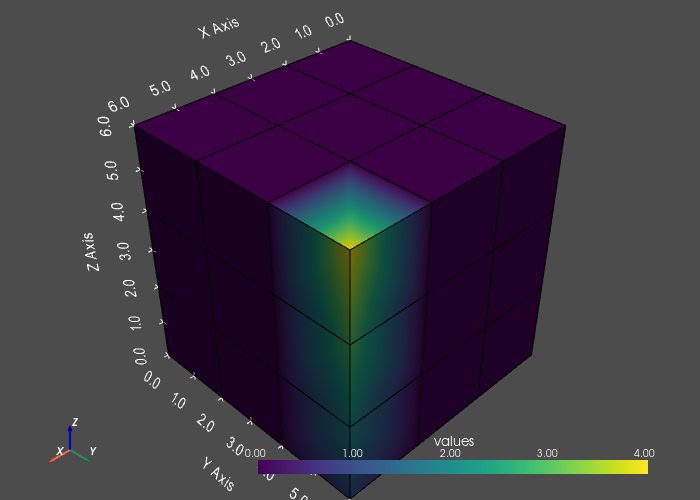

In [26]:
ug.plot(show_edges=1, show_grid=1, show_axes=1)

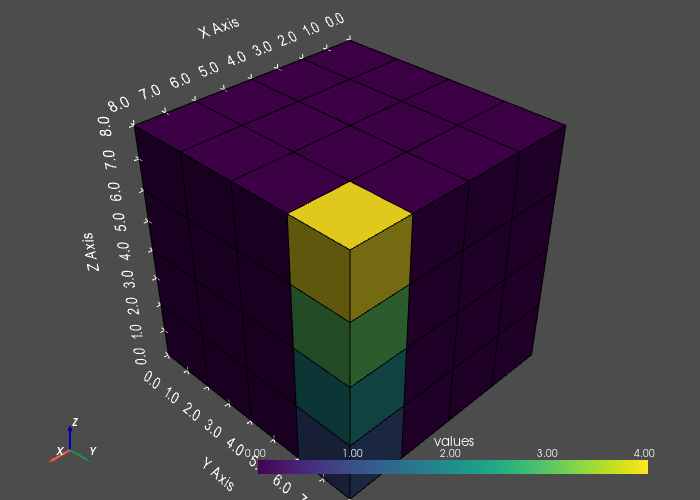

In [22]:
ug.plot(show_edges=1, show_grid=1, show_axes=1)

## Orientation

In [164]:
# p = pv.Plotter()
# p.show_axes()
# p.show_grid()
# p.add_mesh(ug)
# p.view_yx() # note
# p.show()

In [162]:
# help(p.show)

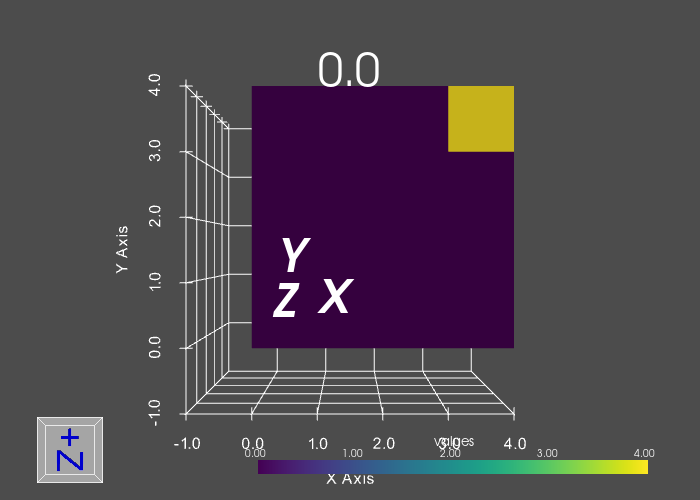

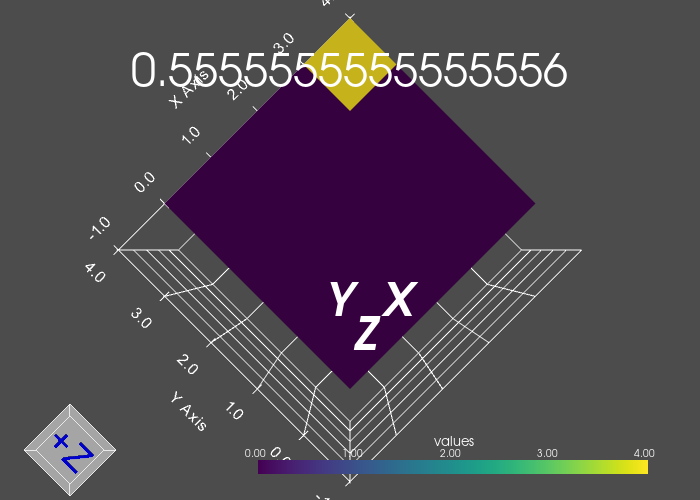

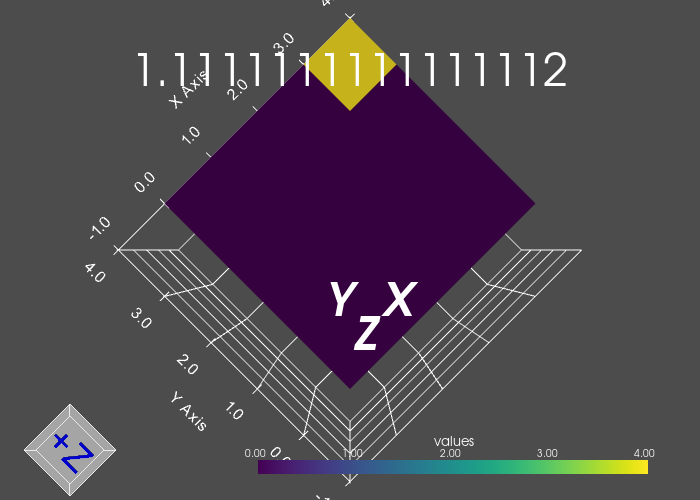

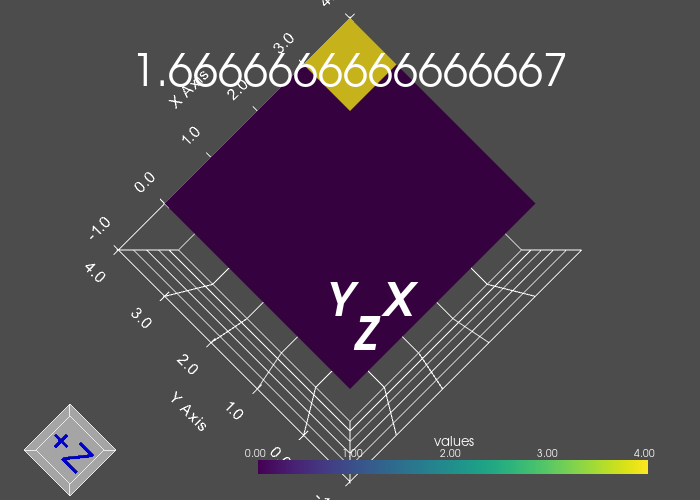

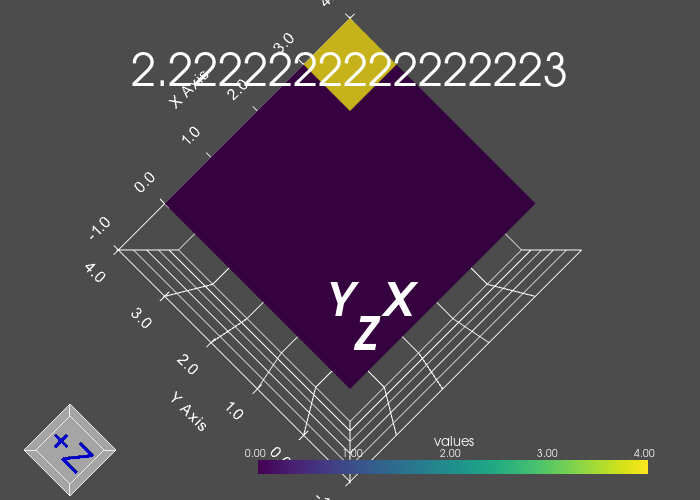

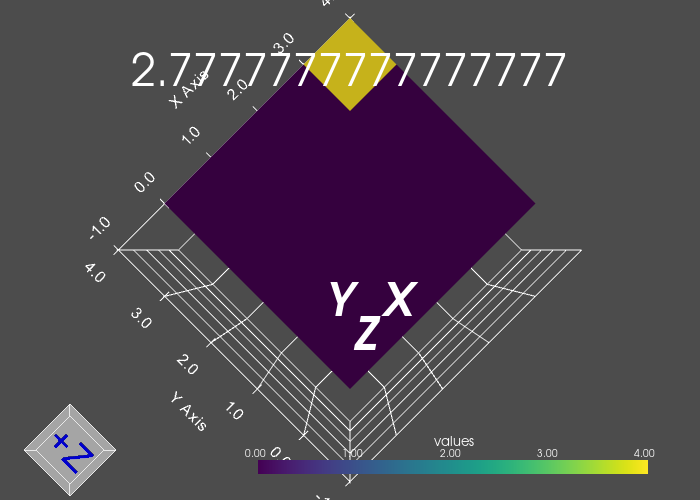

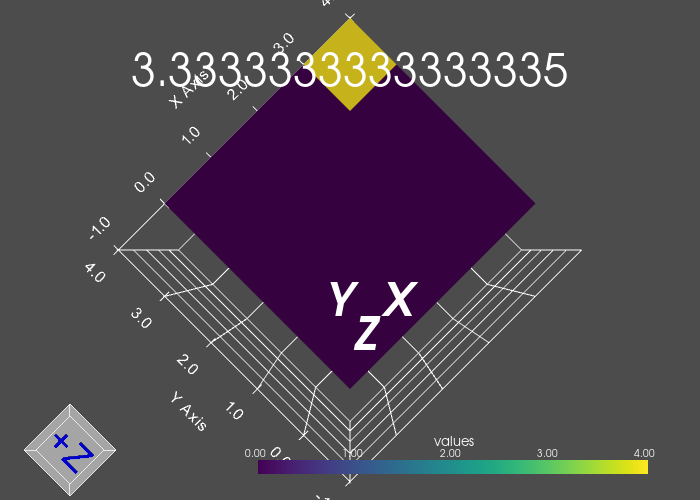

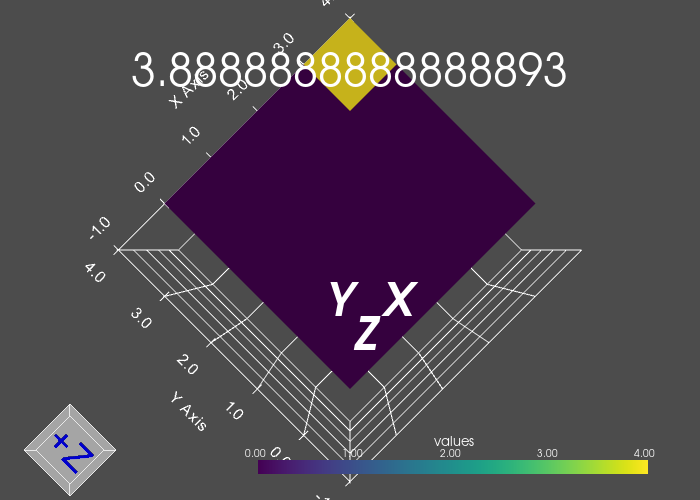

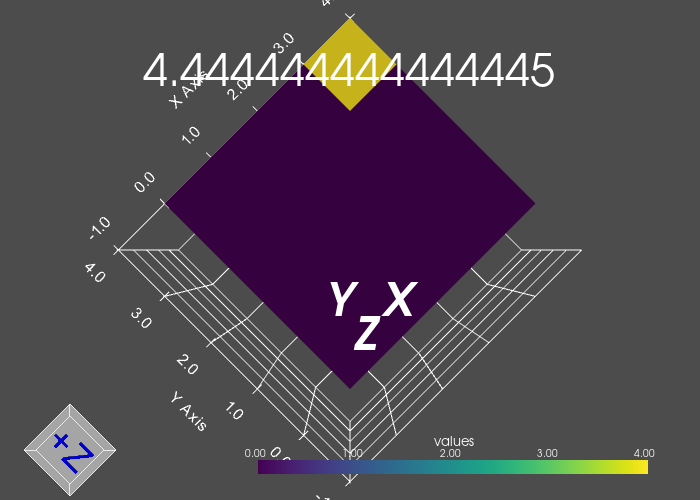

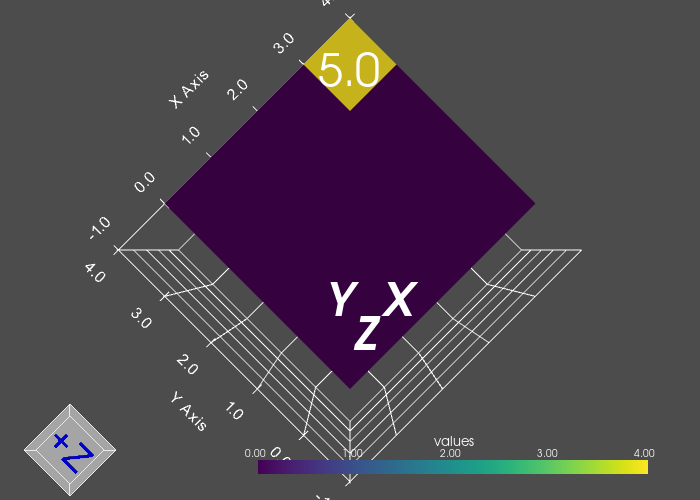

In [174]:
for i in np.linspace(0,5,10):
#     cpos = ug.plot(show_edges=True, show_bounds=1, return_cpos=1, cpos=[i,1,1], text=str(i))
    p = pv.Plotter()
    p.show_axes()
    p.add_axes_at_origin()
#  'add_background_image',
#     p.add_bounding_box()
    p.show_grid()
    p.add_mesh(ug)
    p.set_viewup([i,i,-i])
#     p.view_yx()
    p.add_title(str(i))
    p.show()
    

In [168]:
dir(p)

['_BasePlotter__before_close_callback',
 '_Plotter__prior_window_size',
 '__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_before_close_callback',
 '_check_has_ren_win',
 '_check_rendered',
 '_clear_ren_win',
 '_closed',
 '_first_time',
 '_has_background_layer',
 '_id_name',
 '_image_depth_null',
 '_labels',
 '_on_first_render_request',
 '_prep_for_close',
 '_rendered',
 '_run_image_filter',
 '_save_image',
 '_scalar_bar_slot_lookup',
 '_scalar_bar_slots',
 '_scalar_bars',
 '_store_image',
 '_theme',
 '_window_size_unset',
 'add_actor',
 'add_arrows',
 'add_axes',
 'add_axes_at_origin',
 'add_background_image',
 'add_bounding_box',
 'add_box_widget',
 'add_c

# Show both grids

In [45]:
%%time 
nx, ny, nz = 4, 4, 4
v = np.zeros((nx,ny,nz))
v[-1,-1,:] = np.arange(1,n+1) # set z at last index of x and y

ug = pv.UniformGrid()
x1, y1, z1 = np.ones(3) * 100
x2, y2, z2 = np.ones(3) * 200
dx, dy, dz = (x2-x1)/(nx), (y2-y1)/(ny), (z2-z1)/(nz) # if cells, if points, use (nx-1) etc/
print(x1,x2,y1,y2,z1,z2)
print(dx,dy,dz)
ug.origin = (x1,y1,z1)  # The bottom left corner of the data set
ug.spacing = (dx,dy,dz)  # These are the cell sizes along each axis
ug.dimensions = np.array(v.shape) + 1 # +1 because these are nodes v will be assigned to cells 
ug.cell_data["values"] = v.flatten(order="F") 
# ug.dimensions = np.array(v.shape)
# ug.point_data["values"] = v.flatten(order="F") 

100.0 200.0 100.0 200.0 100.0 200.0
25.0 25.0 25.0
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.72 ms


In [48]:
%%time 
x = np.linspace(x1, x2, 10)
y = np.linspace(y1, y2, 10)
x, y = np.meshgrid(x, y)
z = np.ones(x.shape) * (z1 + (z2-z1)/2)
# Create and structured surface
sg = pv.StructuredGrid(x, y, z)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 906 µs


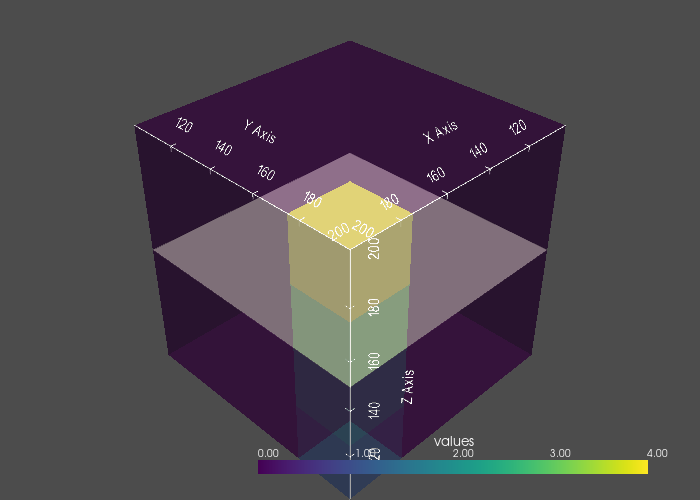

In [49]:
p = pv.Plotter(notebook=1, off_screen=1)
p.add_mesh(ug, opacity=.5)
p.add_mesh(sg, smooth_shading=1, interpolate_before_map=0,
#           scalars=z.ravel(),
          )
# p.add_title('My title')
p.show_grid()
p.show_bounds()
p.show(
#     interactive_update=1
)

# Opacity

In [188]:
opacity.flatten(order='F')

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [187]:
# help(p.add_mesh)

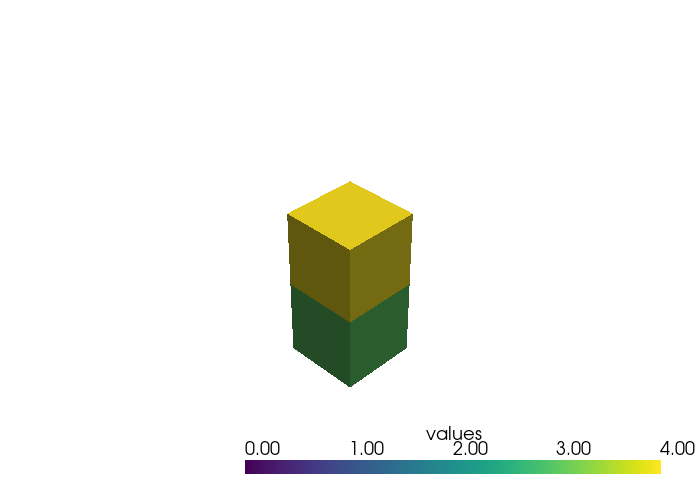

In [228]:
nx, ny, nz = 4, 4, 4
v = np.zeros((nx,ny,nz))
v[-1,-1,:] = np.arange(1,nz+1) 
ug = np2ug(v)
p = Pl()
opacity = (v>2).astype(int)
p.add_mesh(ug, opacity=opacity.flatten(order='F'))
p.show()

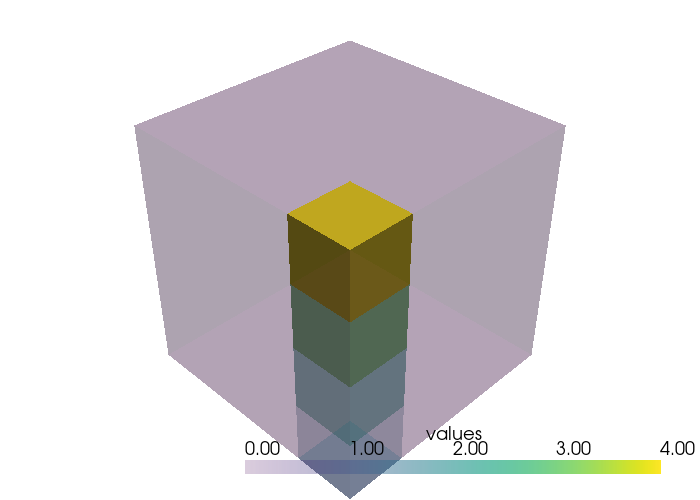

In [231]:
nx, ny, nz = 4, 4, 4
v = np.zeros((nx,ny,nz))
v[-1,-1,:] = np.arange(1,nz+1) 
ug = np2ug(v)
p = Pl()
p.add_mesh(ug, opacity=[0.2, 1])
p.show()

# Contours

In [23]:
# bt.plot()

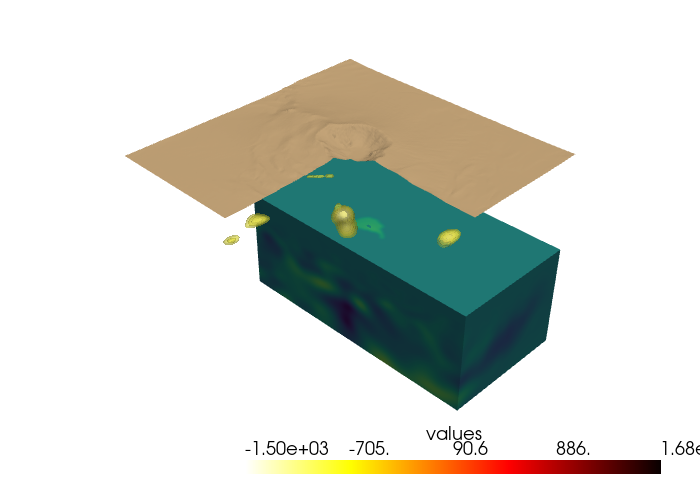

In [21]:
ug = Ug(dvp_arr[160], extent=extent_vp, cell_data=0)

p = Pl()
# p.add_mesh(ug, opacity=0.6)
sls = ug.slice_orthogonal(x=13.25e3, y=8.75e3, z=-2.5e3)
crs = [ug.contour([i]) for i in np.arange(-1.5e3,-800, 100)]
p.add_mesh(ug.clip(normal=(1,0,0), invert=1), opacity=1)
p.add_mesh(bt.clip(normal=(1,0,0), invert=1), opacity=1)
p.add_mesh(bt.clip(normal=(0,1,0), invert=1), opacity=1)
# for sl in sls:
#     p.add_mesh(sl, cmap='hot_r')
for i, cr in enumerate(crs):
    try:
        p.add_mesh(cr, opacity=1-i*0.1, cmap='hot_r')
    except ValueError:
        continue
p.show()

# Connectivity

In [173]:
help(ug.connectivity)

Help on method connectivity in module pyvista.core.filters.data_set:

connectivity(largest=False, progress_bar=False) method of __main__.Ug instance
    Find and label connected bodies/volumes.
    
    This adds an ID array to the point and cell data to
    distinguish separate connected bodies. This applies a
    ``vtkConnectivityFilter`` filter which extracts cells that
    share common points and/or meet other connectivity criterion.
    
    Cells that share vertices and meet other connectivity
    criterion such as scalar range are known as a region.
    
    Parameters
    ----------
    largest : bool
        Extract the largest connected part of the mesh.
    
    progress_bar : bool, optional
        Display a progress bar to indicate progress.
    
    Returns
    -------
    pyvista.DataSet
        Dataset with labeled connected bodies.  Return type
        matches input.
    
    Examples
    --------
    Join two meshes together and plot their connectivity.
    
    >>> i

# Slicing

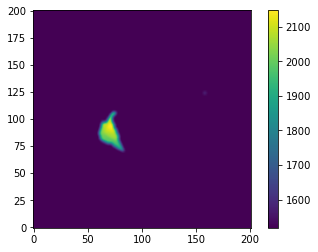

In [54]:
# data 
fname = '../../data/p14-CP00160-Vp_x8000_18000_y4000_14000_z0_4000_shape201x201x81.mmp'
vp = np.memmap(fname, dtype=np.float32, shape=(201,201,81))
x1, x2, y1, y2, z1, z2 = 8e3, 18e3, 4e3, 14e3, 0, -4e3
extent = [[x1, x2], [y1, y2], [z1, z2]]
plt.imshow(vp[...,0].T)
plt.colorbar()
plt.gca().invert_yaxis()

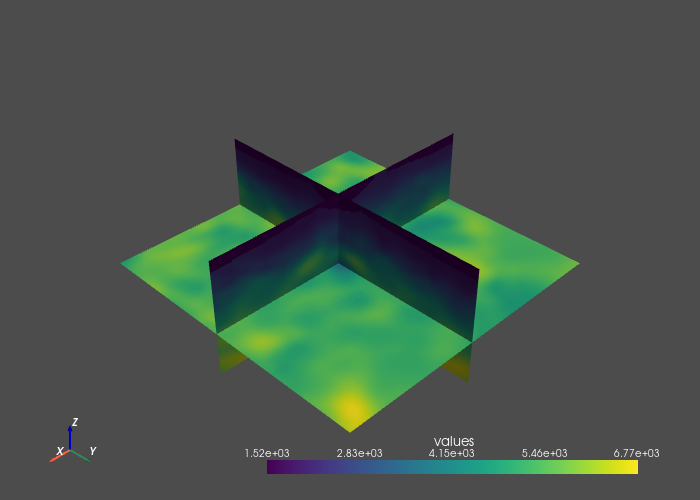

In [66]:
ug = Ug(vp, extent=extent)
sls = ug.slice_orthogonal(x=13.25e3, y=8.75e3, z=-2.5e3)
sls.plot()

# Clipping

In [162]:
help(ug.clip)

Help on method clip in module pyvista.core.filters.data_set:

clip(normal='x', origin=None, invert=True, value=0.0, inplace=False, return_clipped=False, progress_bar=False) method of pyvista.core.grid.UniformGrid instance
    Clip a dataset by a plane by specifying the origin and normal.
    
    If no parameters are given the clip will occur in the center
    of that dataset.
    
    Parameters
    ----------
    normal : tuple(float) or str
        Length 3 tuple for the normal vector direction. Can also
        be specified as a string conventional direction such as
        ``'x'`` for ``(1,0,0)`` or ``'-x'`` for ``(-1,0,0)``, etc.
    
    origin : tuple(float), optional
        The center ``(x,y,z)`` coordinate of the plane on which the clip
        occurs. The default is the center of the dataset.
    
    invert : bool, optional
        Flag on whether to flip/invert the clip.
    
    value : float, optional
        Set the clipping value along the normal direction.
        Th

## With a plane

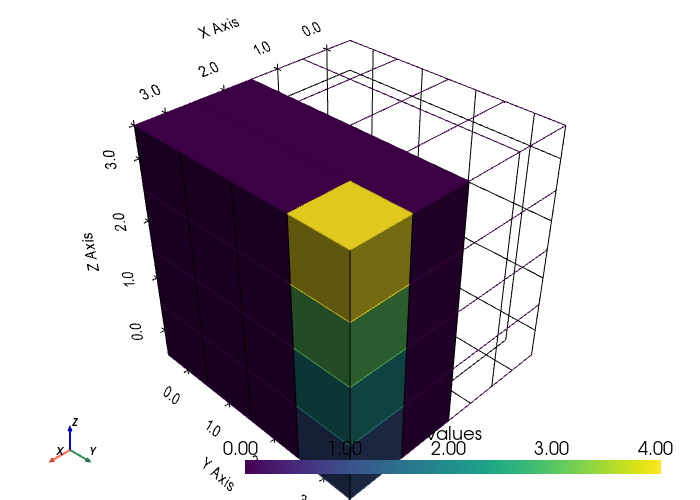

In [70]:
# plot 
nx, ny, nz = 4, 4, 4
v = np.zeros((nx,ny,nz))
v[-1,-1,:] = np.arange(1,nz+1) 
ug = np2ug(v)
p = pv.Plotter()
p.add_mesh(ug, style='wireframe')
p.add_mesh(ug.clip(normal=(1,0,0), invert=False), 
#            origin=(0,0,0),
          )
p.show_axes()
p.show_grid()
p.show()

## With a plane

In [41]:
ug

Ug (0x7f614464db80)
  N Cells:	3272481
  N Points:	3345928
  X Bounds:	7.975e+03, 1.802e+04
  Y Bounds:	3.975e+03, 1.402e+04
  Z Bounds:	-4.025e+03, 2.500e+01
  Dimensions:	202, 202, 82
  Spacing:	5.000e+01, 5.000e+01, -5.000e+01
  N Arrays:	1

why does it mess up the z boudns?

In [ ]:
cpd

In [43]:
cpd = ug.clip(normal='y', invert=1)
cpd

UnstructuredGrid (0x7f6142383160)
  N Cells:	1644381
  N Points:	1689528
  X Bounds:	7.975e+03, 1.802e+04
  Y Bounds:	3.975e+03, 9.000e+03
  Z Bounds:	-8.075e+03, -4.025e+03
  N Arrays:	1

In [64]:
# dvp_arr[10]

In [65]:
ug = np2ug(dvp_arr[10])

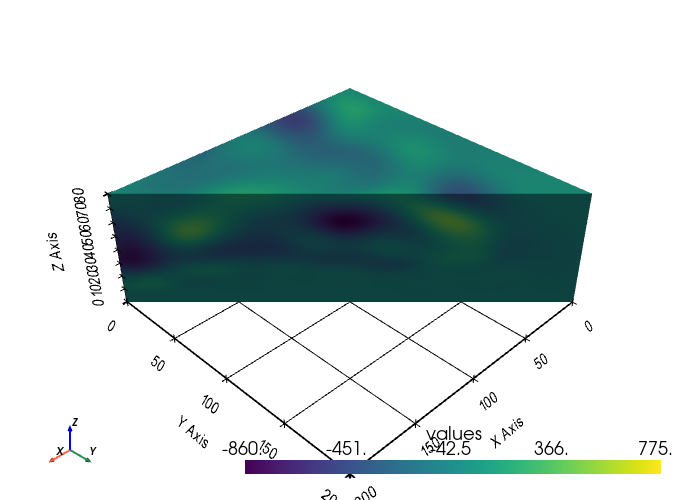

In [80]:
p = pv.Plotter()
# p.add_mesh(ug,
# #            style='wireframe'
#            opacity=.5
#           )
p.add_mesh(ug.clip(normal=[.5,.5,0], invert=1))
# p.add_mesh(ug.clip(normal='x', invert=1))
p.show_axes()
p.show_grid()
p.show()

## With a box

In [304]:
help(ug.clip_box)

Help on method clip_box in module pyvista.core.filters.data_set:

clip_box(bounds=None, invert=True, factor=0.35, progress_bar=False) method of pyvista.core.grid.UniformGrid instance
    Clip a dataset by a bounding box defined by the bounds.
    
    If no bounds are given, a corner of the dataset bounds will be removed.
    
    Parameters
    ----------
    bounds : tuple(float), optional
        Length 6 sequence of floats: (xmin, xmax, ymin, ymax, zmin, zmax).
        Length 3 sequence of floats: distances from the min coordinate of
        of the input mesh. Single float value: uniform distance from the
        min coordinate. Length 12 sequence of length 3 sequence of floats:
        a plane collection (normal, center, ...).
        :class:`pyvista.PolyData`: if a poly mesh is passed that represents
        a box with 6 faces that all form a standard box, then planes will
        be extracted from the box to define the clipping region.
    
    invert : bool, optional
        Fl

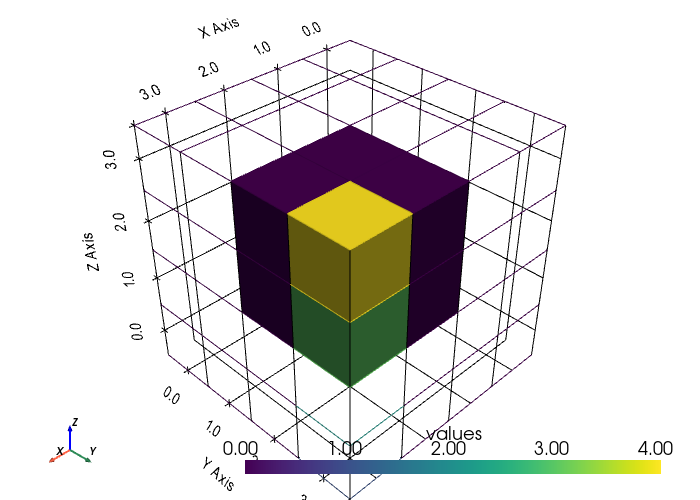

In [387]:
nx, ny, nz = 4, 4, 4
a = np.zeros((nx,ny,nz))
a[-1,-1,:] = np.arange(1,nz+1) 
v = Vol(a)
p = Pl()
p.add_mesh(v, style='wireframe')
p.add_mesh(v.crop([2,3, 2,3, 2,3])) 
# p.add_mesh(v.carve([2,3, 2,3, 2,3])) 
p.show_axes()
p.show_grid()
p.show()

### Test-ground

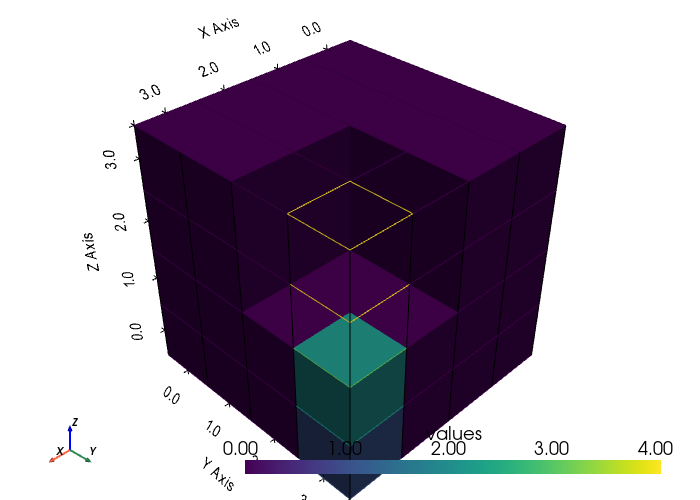

In [354]:
nx, ny, nz = 4, 4, 4
v = np.zeros((nx,ny,nz))
v[-1,-1,:] = np.arange(1,nz+1) 
ug = Vol(np2ug(v))
p = pv.Plotter()
p.add_mesh(ug,
           style='wireframe'
          )
box = [1.5,3.5, 1.5,3.5, 1.5,3.5]
# p.add_mesh(ug.clip_box(box, invert=1)) 
p.add_mesh(ug.clip([2,3, 2,3, 2,3])) 
# p.add_mesh(ug.clip([[2,3],[2,3],[2,3]])) 
p.show_axes()
p.show_grid()
p.show()

# Bathymetry

In [46]:
dx, dy, dz = 50, 50, 50
x1 = 8e3
x2 = 18e3
y1 = 4e3
y2 = 14e3
ix1, iy1 = 55, 55
ix2, iy2 = 136, 136
x1 = x1 + ix1 * dx
y1 = y1 + iy1 * dy
x2 = x2 + ix2 * dx
y2 = y2 + iy2 * dy

In [78]:
# data 
fname = '../../data/bt_x8000_18000_y4000_14000_shape201x201.mmp'
bt = np.memmap(fname, dtype=np.float32, shape=(201,201))
# plt.imshow(bt.T)
# # plt.imshow(bt[55:136,55:136].T)
# plt.colorbar()
# plt.gca().invert_yaxis()

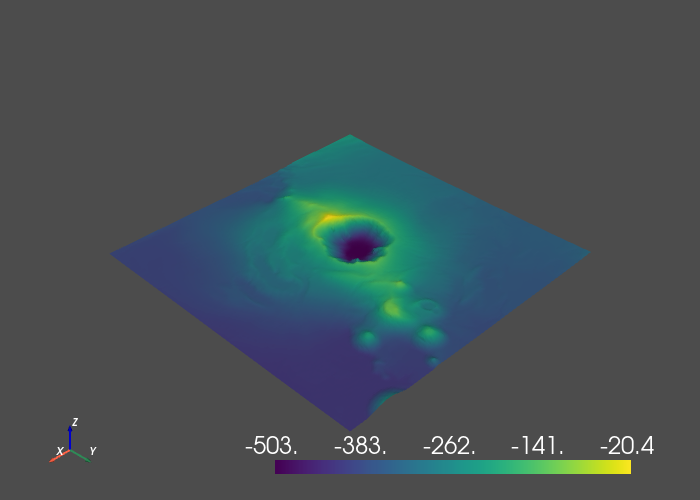

In [67]:
sg = Sg(-bt, extent=[[8e3, 18e3], [4e3, 14e3]])
sg.plot(color_scale=1)

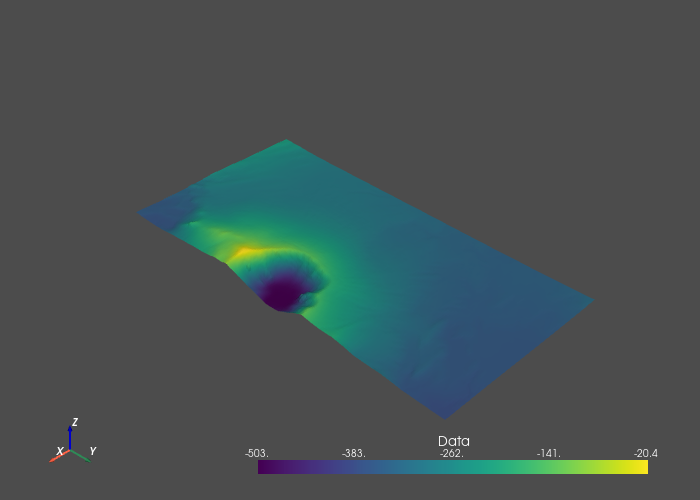

In [76]:
sg.clip(normal=(1,0,0), invert=1).plot()
#            origin=(0,0,0),

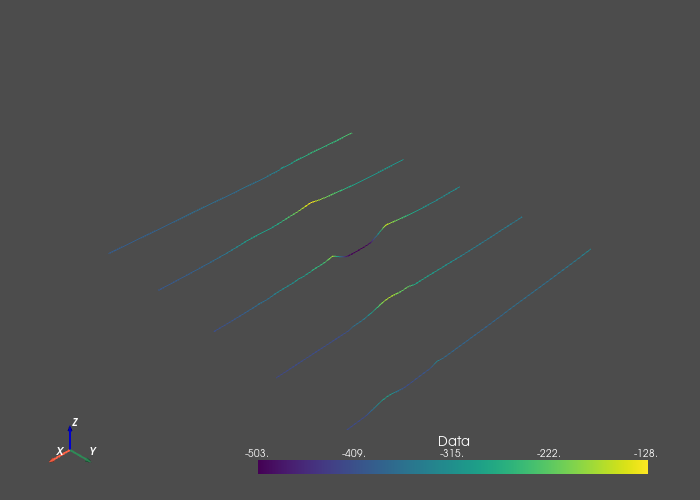

In [73]:
sg.slice_along_axis(axis="y").plot()

# Vp model

## Isocontours

## Slice

## Clip

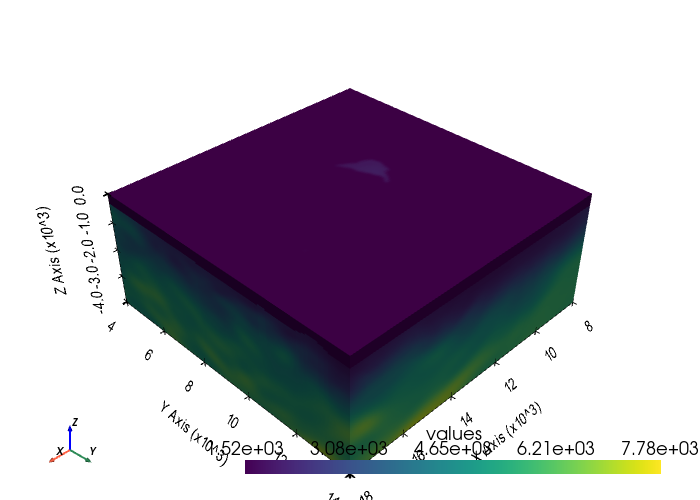

In [210]:
ug = Ug(vp, extent=extent_vp)
ug.show()

## Carve

In [ ]:
%%time 
v = Vol(vp, extent=extent)
p = Pl()
# p.add_mesh(v)
# p.... add_mesh(v.carve([17e3,18e3, 12e3,14e3, -1e3,0])) # crashed RAM
p.show_grid()
p.show_axes()
p.show()

## Opacity

In [81]:
p = Pl()
help(p.enable_depth_peeling)

Help on method enable_depth_peeling in module pyvista.plotting.renderer:

enable_depth_peeling(number_of_peels=None, occlusion_ratio=None) method of pyvista.plotting.plotting.Plotter instance
    Enable depth peeling to improve rendering of translucent geometry.
    
    Parameters
    ----------
    number_of_peels : int
        The maximum number of peeling layers. Initial value is 4
        and is set in the ``pyvista.global_theme``. A special value of
        0 means no maximum limit.  It has to be a positive value.
    
    occlusion_ratio : float
        The threshold under which the depth peeling algorithm
        stops to iterate over peel layers. This is the ratio of
        the number of pixels that have been touched by the last
        layer over the total number of pixels of the viewport
        area. Initial value is 0.0, meaning rendering has to be
        exact. Greater values may speed up the rendering with
        small impact on the quality.
    
    Returns
    -----

In [128]:
op = (vp>1550).astype(int)
op.shape

(201, 201, 81)

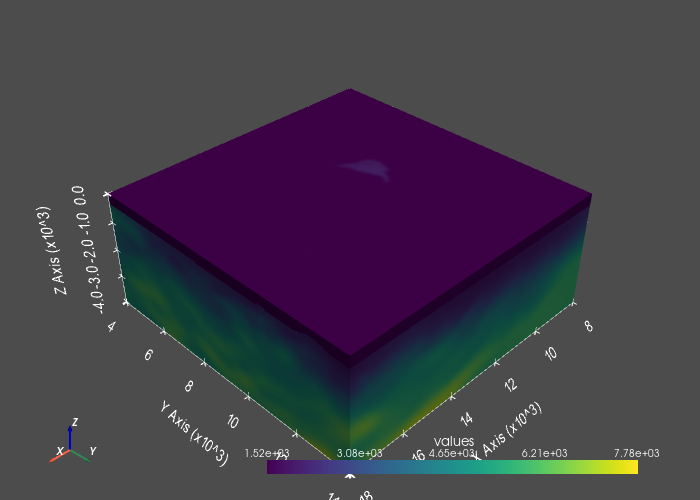

In [159]:
# plot 
# for i in range(2,30,5):
for i in [100]:
    p = pv.Plotter(off_screen=True)
#     p.enable_depth_peeling(i)
    p.disable_depth_peeling()
#     p.add_mesh(ug, opacity=op.flatten('F'))
    p.add_mesh(ug, opacity=1)
    p.show_grid()
    # p.view_zx()
    p.show_axes()
    p.show()

# Complex figures

## Fig.

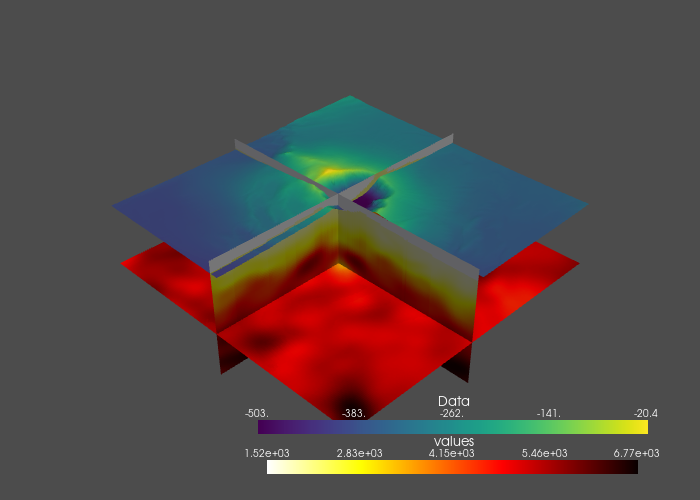

In [116]:
p = Pl()
sls = ug.slice_orthogonal(x=13.25e3, y=8.75e3, z=-2.5e3)
p.add_mesh(sls, cmap='hot_r')
p.add_mesh(sg.clip(normal=(1,0,0), invert=1), opacity=1)
p.add_mesh(sg.clip(normal=(0,1,0), invert=1), opacity=1)
p.show()

## Fig.

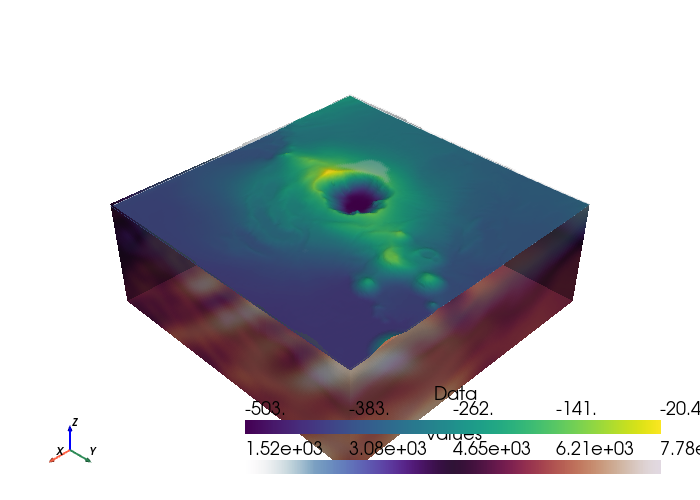

In [244]:
# plot 
p = pv.Plotter(off_screen=True)
p.add_mesh(ug, cmap='twilight', opacity=[0,1,1,1,1,1,1])
p.add_mesh(sg)
# p.show_grid()
# p.view_xy()
p.show_axes()
p.show()

In [8]:
# clipped = ug.compute_implicit_distance(sg, inplace=True)

# ...